In [17]:
import tensorflow as tf
# Define the directory containing your dataset
dataset_dir = "/kaggle/input/galliformespectra-a-hen-breed-dataset/train(Original)"

# Define parameters for loading the dataset
batch_size = 32
img_size = (224, 224)
seed = 42

In [18]:
# Create the TensorFlow dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,  # 80% for training, 20% for validation
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
)


Found 1010 files belonging to 10 classes.
Using 808 files for training.


In [19]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
)

Found 1010 files belonging to 10 classes.
Using 202 files for validation.


In [21]:
# Print class names
class_names = train_dataset.class_names
print("Class names:", class_names)

Class names: ['bielefelder', 'blackorpington', 'brahma', 'buckeye', 'fayoumi', 'leghorn', 'newhampshire', 'plymouthrock', 'sussex', 'turken']


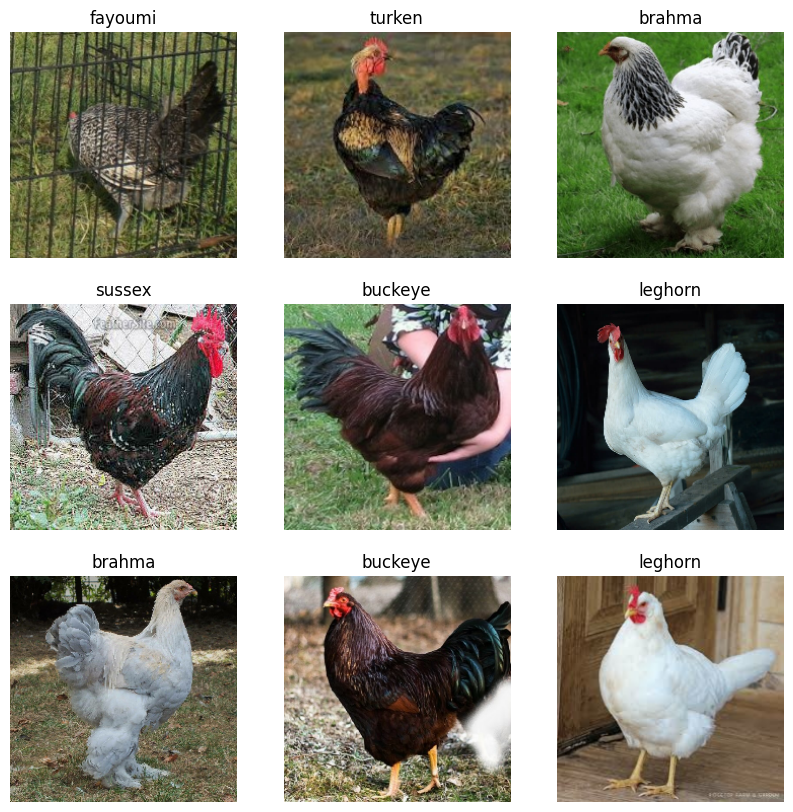

In [22]:
"""# Visualize the first batch"""

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [ ]:
"""model"""

from tensorflow.keras import layers

# Define the model
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(324, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))  # Output layer with number of classes
])


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)


Epoch 1/10
26/26 [==============================] - 58s 2s/step - loss: 1.0095 - accuracy: 0.6634 - val_loss: 1.3296 - val_accuracy: 0.5594
Epoch 2/10
26/26 [==============================] - 57s 2s/step - loss: 0.6940 - accuracy: 0.7488 - val_loss: 1.1274 - val_accuracy: 0.6238
Epoch 3/10
26/26 [==============================] - 56s 2s/step - loss: 0.5412 - accuracy: 0.7884 - val_loss: 1.4583 - val_accuracy: 0.5941
Epoch 4/10
26/26 [==============================] - 56s 2s/step - loss: 0.5083 - accuracy: 0.8131 - val_loss: 1.3043 - val_accuracy: 0.6386
Epoch 5/10
26/26 [==============================] - 56s 2s/step - loss: 0.3185 - accuracy: 0.8874 - val_loss: 1.3866 - val_accuracy: 0.6634
Epoch 6/10
26/26 [==============================] - 57s 2s/step - loss: 0.2847 - accuracy: 0.9035 - val_loss: 1.5776 - val_accuracy: 0.6683
Epoch 7/10
26/26 [==============================] - 56s 2s/step - loss: 0.2481 - accuracy: 0.9208 - val_loss: 1.5897 - val_accuracy: 0.6337
Epoch 8/10
26/26 [==

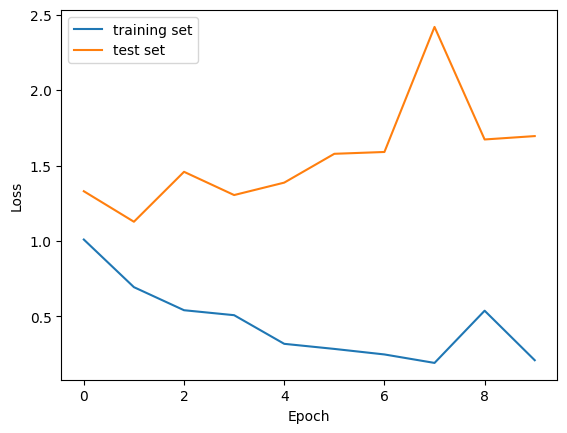

In [13]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label = 'training set')
plt.plot(history.history['val_loss'], label = 'test set')
plt.legend()

In [14]:
model.save("hen.h5")